In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
plt.style.use('ggplot')
# import the random module
import random
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages
import itertools
import scipy.stats as st
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
def MAE(sales, forecast):
    error = sales - forecast
    return np.mean(np.abs(error))
def MAPE(sales, forecast):
    error = sales - forecast
    return np.mean(np.abs(error / sales))
def RMSE(sales, forecast):
    error = sales - forecast
    return np.sqrt(np.mean(np.square(error)))

<h1> Question 1 </h1>

In [3]:
coffee = pd.read_csv("CoffeePrice.csv", header = None, names = ["month", "price"])
coffee_price = coffee.price
coffee_month = coffee.month

<h3> Part A </h3>

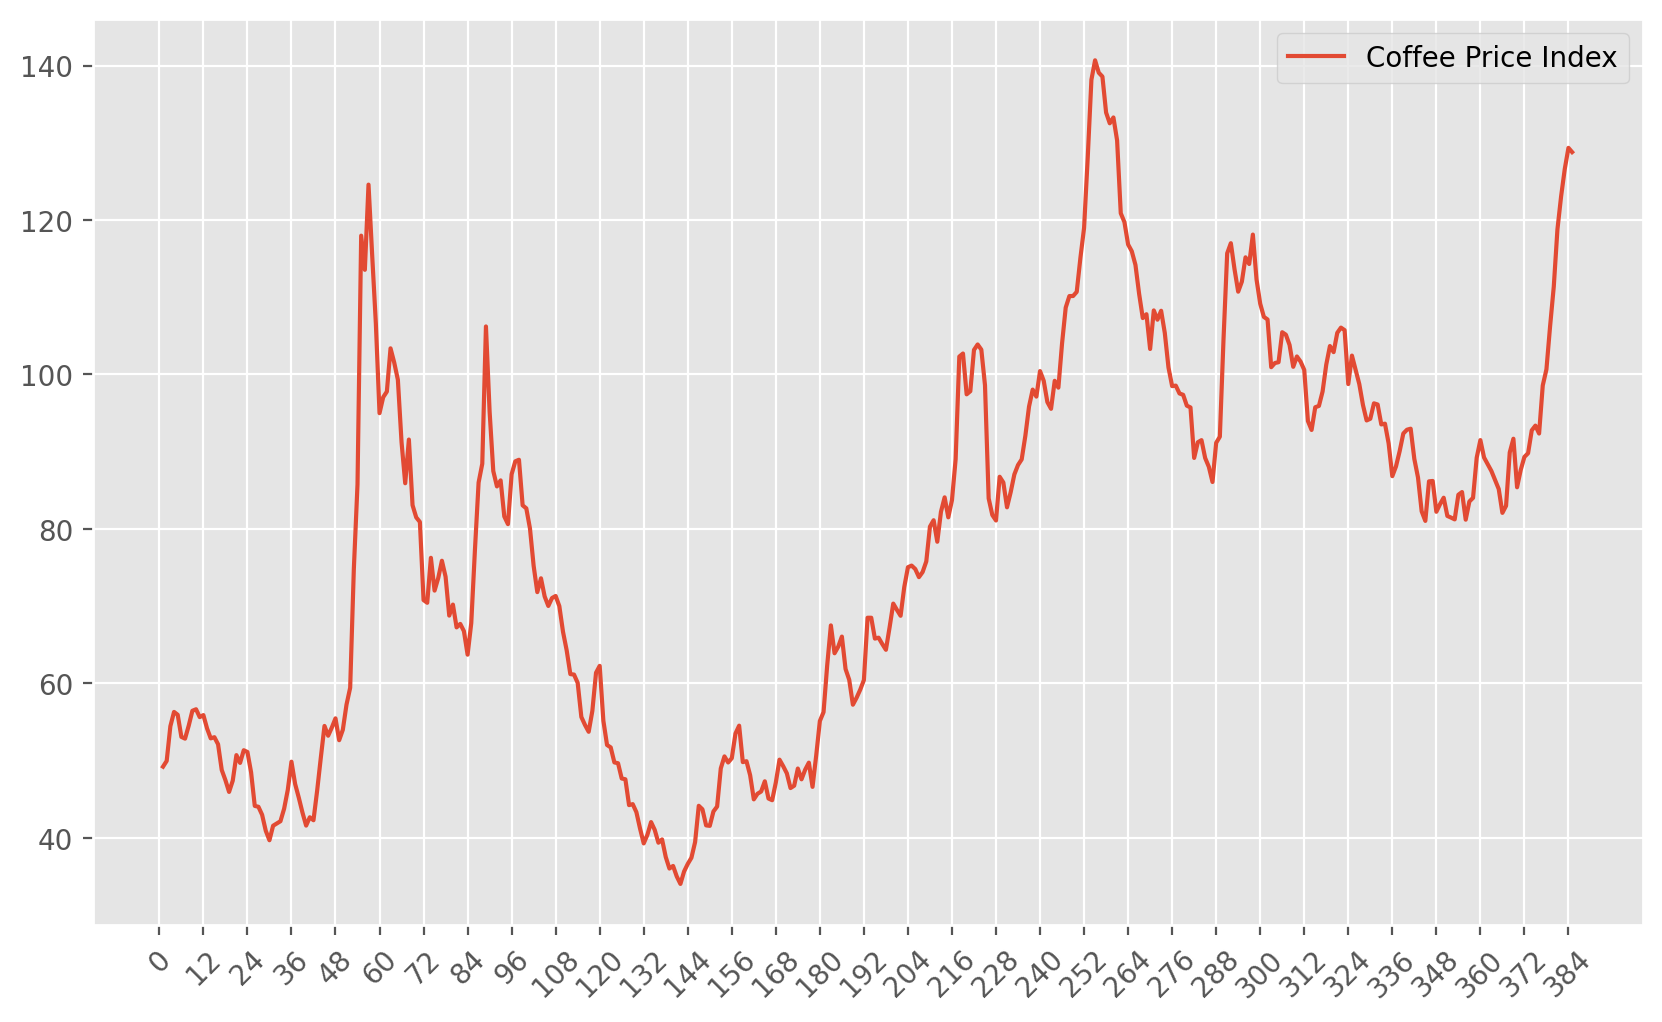

In [4]:
fig, ax = plt.subplots(figsize= (10,6), dpi = 200)
ax.plot(coffee_month, coffee_price, label = "Coffee Price Index")
ax.legend()
ax.set_xticks([12*i for i in range(int(len(coffee)/12) + 1)])
for label in ax.get_xticklabels():
    label.set_rotation(45)
plt.show()

<h3>Part B</h3>

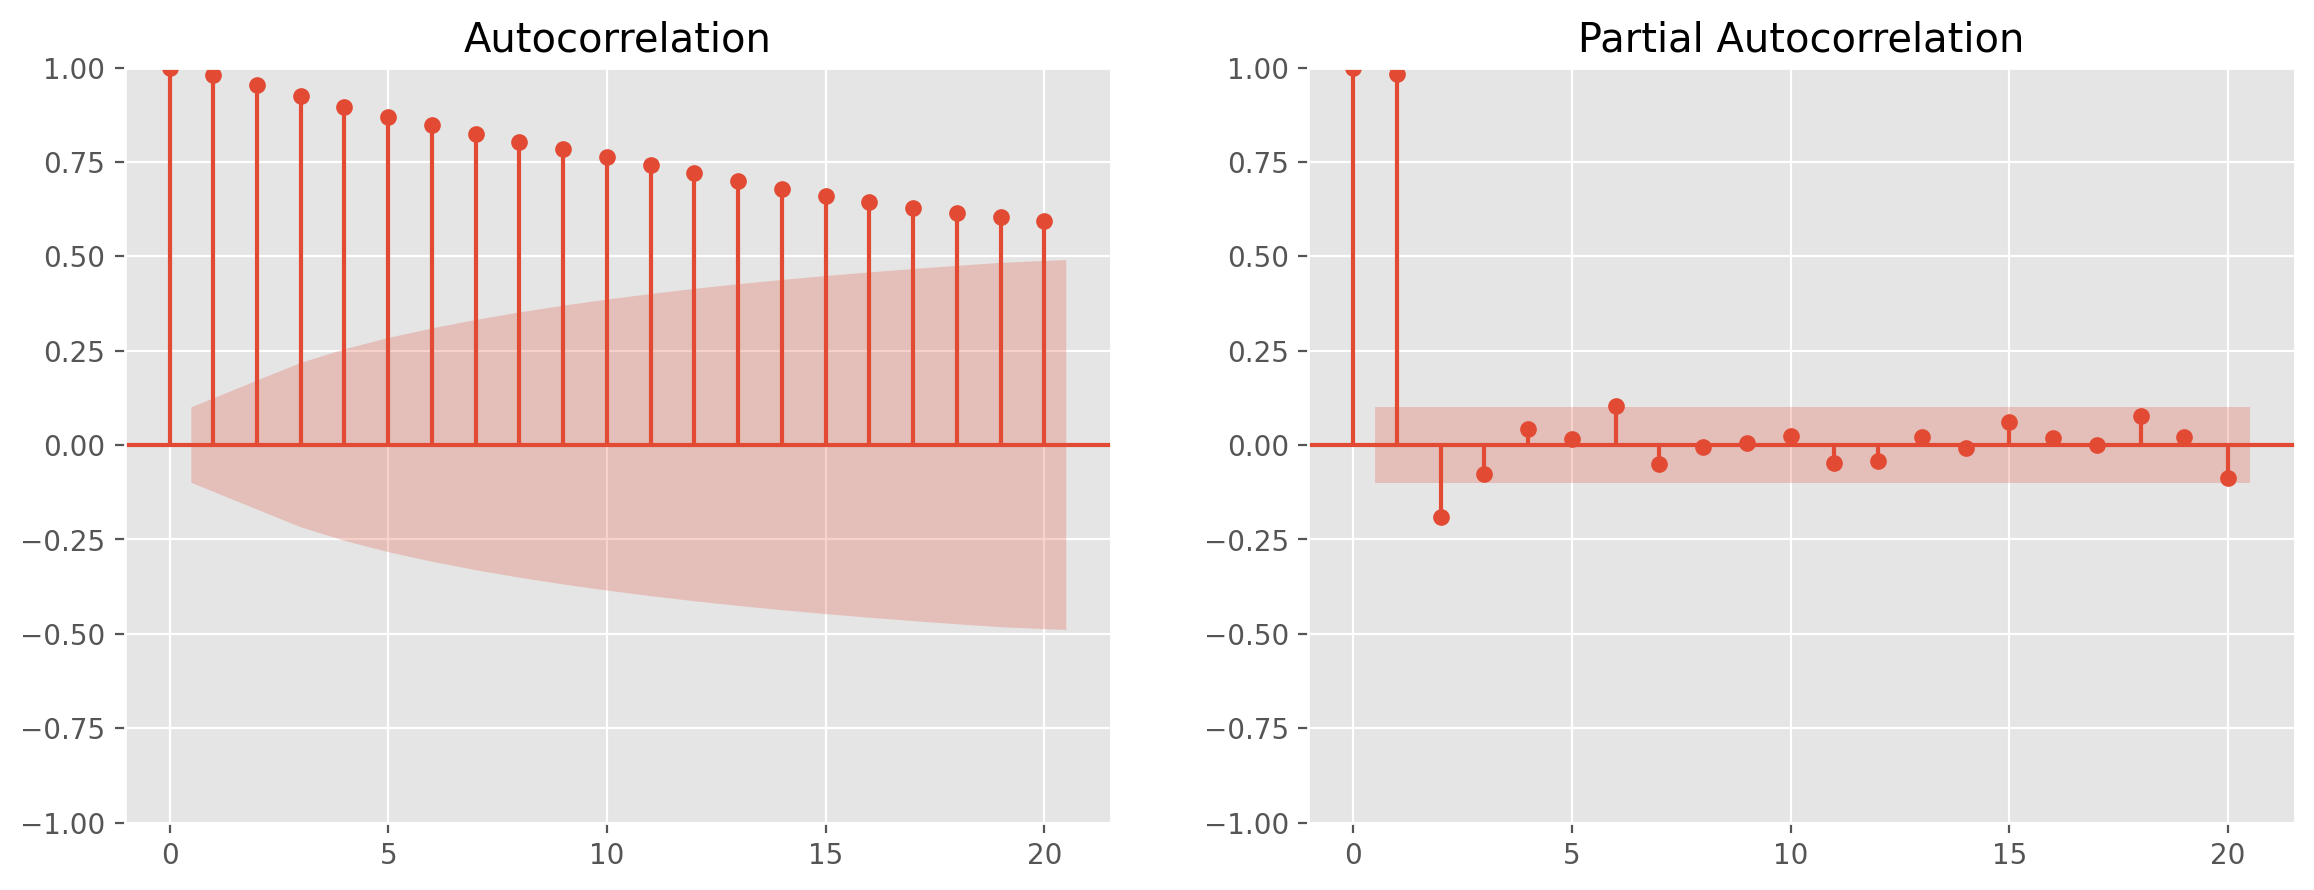

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14,5), dpi = 200)

fig = plot_acf(coffee_price, lags=20, ax=axes[0])
fig = plot_pacf(coffee_price, lags=20, ax=axes[1])

In [6]:
detrended_coffee = np.array([coffee_price[i] - coffee_price[i-1] for i in range(1,len(coffee))])

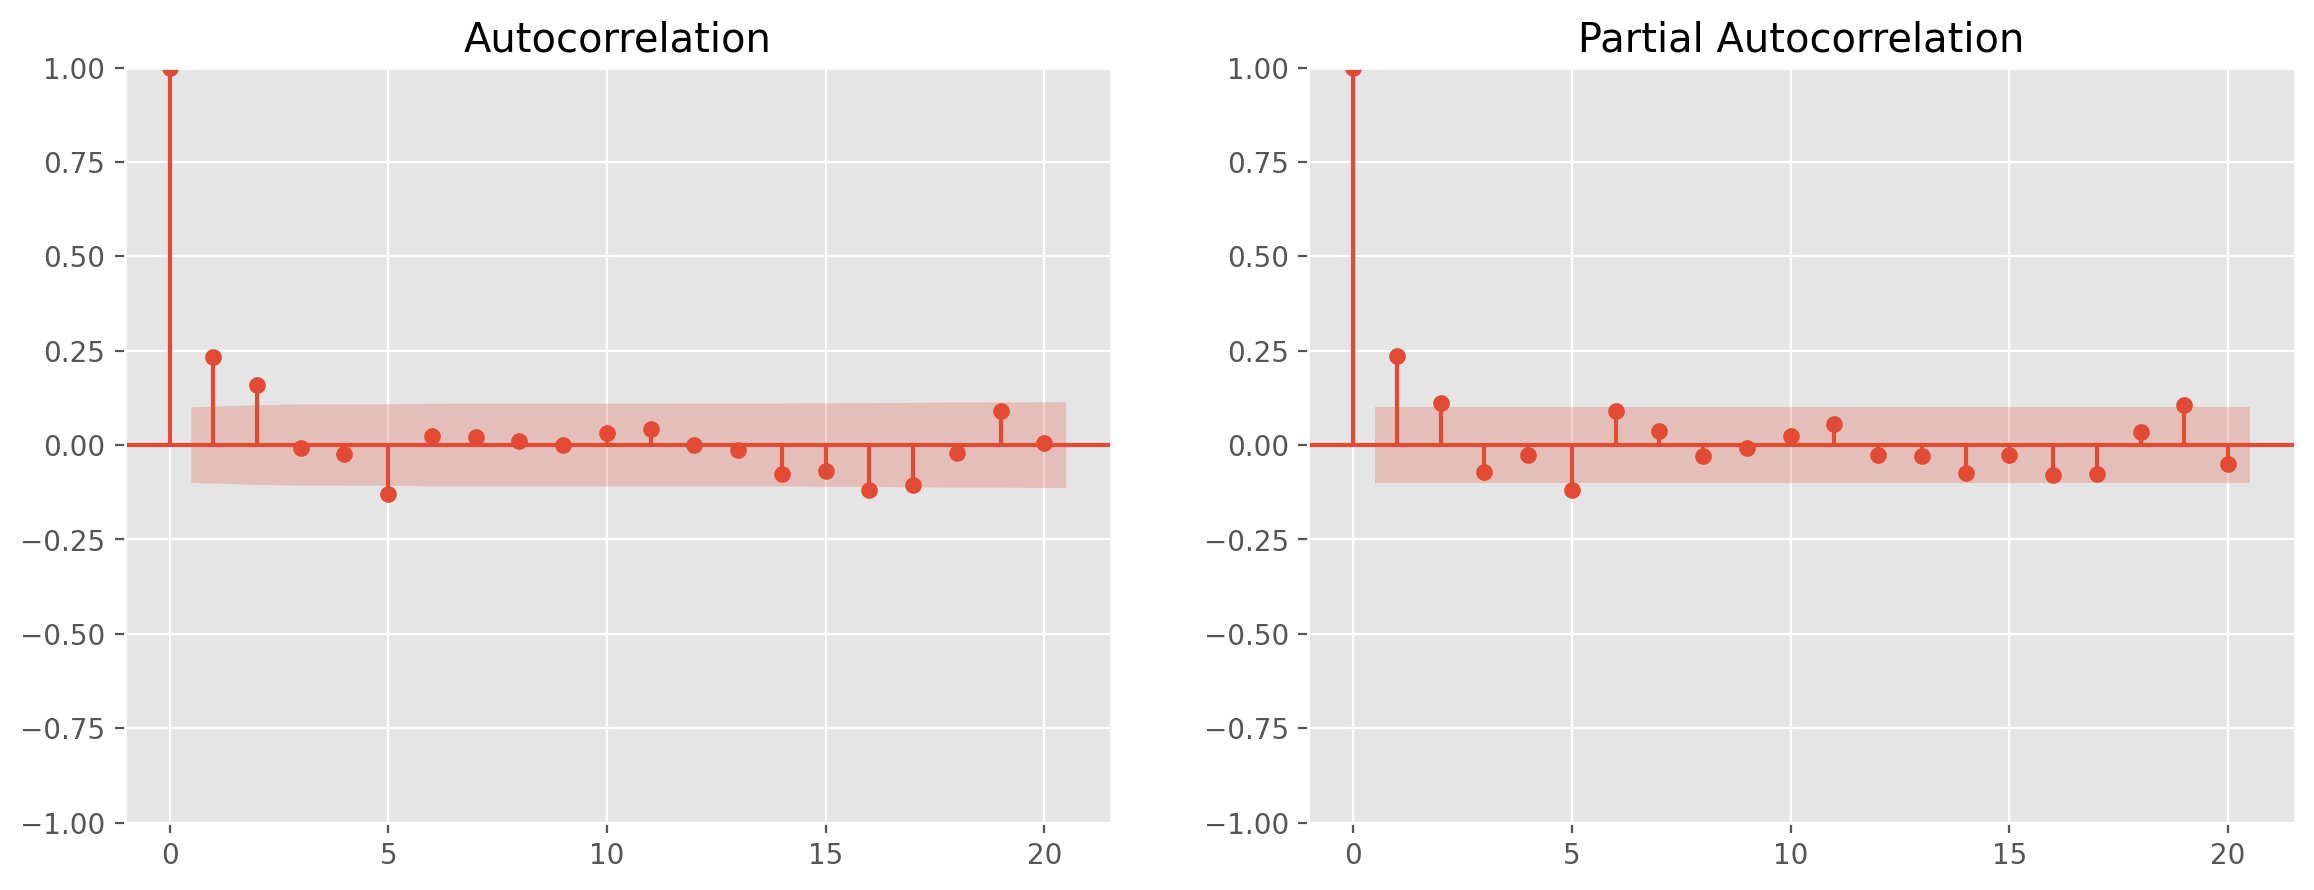

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14,5), dpi = 200)

fig = plot_acf(detrended_coffee, lags=20, ax=axes[0])
fig = plot_pacf(detrended_coffee, lags=20, ax=axes[1])

<h3>Part C</h3>

In [8]:
mod_arma1 = sm.tsa.statespace.SARIMAX(coffee_price, trend ='c', order=(2,1,0),
                                seasonal_order=(0, 0, 0, 0))
results_arma1 = mod_arma1.fit(disp=False) 
results_arma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                  385
Model:               SARIMAX(2, 1, 0)   Log Likelihood               -1071.722
Date:                Tue, 05 Apr 2022   AIC                           2151.443
Time:                        22:52:23   BIC                           2167.246
Sample:                             0   HQIC                          2157.711
                                - 385                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1432      0.233      0.615      0.539      -0.313       0.600
ar.L1          0.2079      0.028      7.529      0.000       0.154       0.262
ar.L2          0.1099      0.035      3.109      0.002       0.041       0.179
sigma2        15.5459      0.630     24.686      0.000      14.312      16.780
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              1124.85
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                             0.93
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
print("MAE of AR(2) model with detrending: {:.5f}".format(MAE(results_arma1.fittedvalues[1:], coffee_price[1:])))
print("MAPE of AR(2) model with detrending: {:.5f}".format(MAPE(results_arma1.fittedvalues[1:], coffee_price[1:])))
print("RMSE of AR(2) model with detrending: {:.5f}".format(RMSE(results_arma1.fittedvalues[1:], coffee_price[1:])))

MAE of AR(2) model with detrending: 2.70268
MAPE of AR(2) model with detrending: 0.03528
RMSE of AR(2) model with detrending: 3.94290


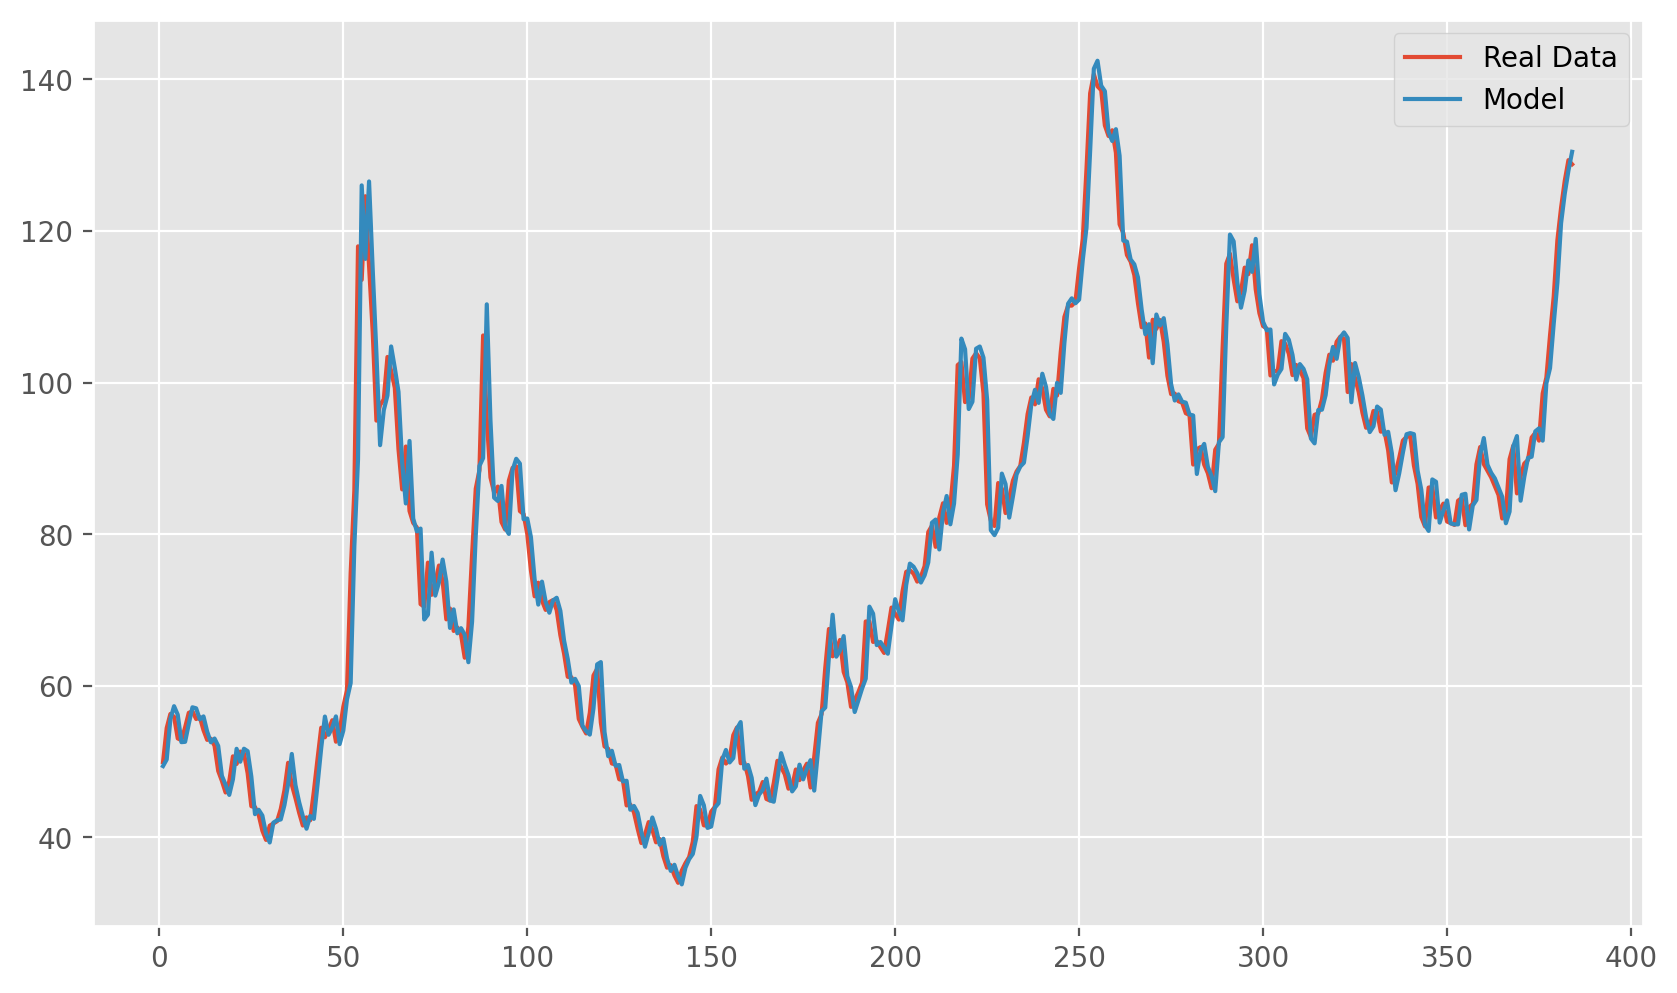

In [10]:
fig, ax = plt.subplots(figsize= (10,6), dpi = 200)
ax.plot(coffee_price[1:], label = "Real Data")
ax.plot(results_arma1.fittedvalues[1:], label = "Model")
ax.legend()
plt.show()

<h3>Part D</h3>

In [11]:
mod_arma2 = sm.tsa.statespace.SARIMAX(coffee_price, trend ='c', order=(0, 1, 2),
                                seasonal_order=(0, 0, 0, 0))
results_arma2 = mod_arma2.fit(disp=False) 
results_arma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                  385
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -1071.301
Date:                Tue, 05 Apr 2022   AIC                           2150.603
Time:                        22:52:23   BIC                           2166.405
Sample:                             0   HQIC                          2156.871
                                - 385                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2076      0.306      0.679      0.497      -0.392       0.807
ma.L1          0.2083      0.030      6.949      0.000       0.150       0.267
ma.L2          0.1549      0.037      4.139      0.000       0.082       0.228
sigma2        15.5119      0.663     23.405      0.000      14.213      16.811
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1148.32
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                             1.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
print("MAE of MA(2) model with detrending: {:.5f}".format(MAE(results_arma2.fittedvalues[1:], coffee_price[1:])))
print("MAPE of MA(2) model with detrending: {:.5f}".format(MAPE(results_arma2.fittedvalues[1:], coffee_price[1:])))
print("RMSE of MA(2) model with detrending: {:.5f}".format(RMSE(results_arma2.fittedvalues[1:], coffee_price[1:])))

MAE of MA(2) model with detrending: 2.71354
MAPE of MA(2) model with detrending: 0.03550
RMSE of MA(2) model with detrending: 3.93859


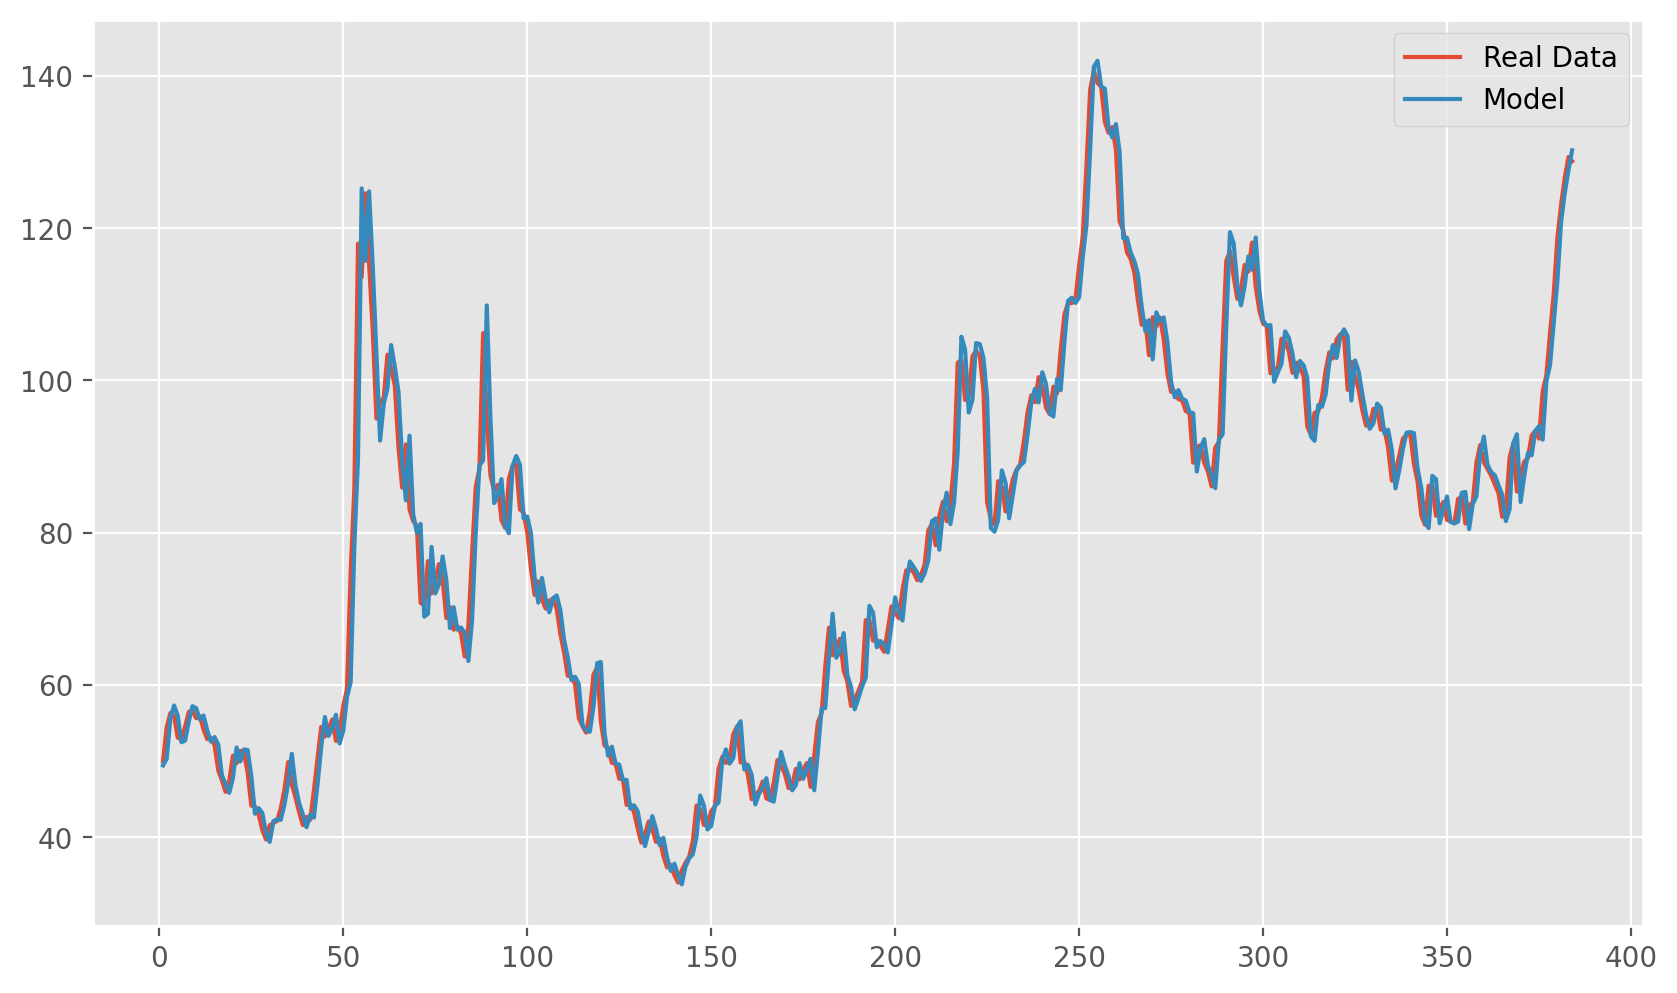

In [13]:
fig, ax = plt.subplots(figsize= (10,6), dpi = 200)
ax.plot(coffee_price[1:], label = "Real Data")
ax.plot(results_arma2.fittedvalues[1:], label = "Model")
ax.legend()
plt.show()

<h3> Part E </h3>

In [14]:
training_set = coffee_price[:int(0.75*len(coffee))]
test_set = coffee_price[int(0.75*len(coffee)):]

In [15]:
mod_arma1 = sm.tsa.statespace.SARIMAX(training_set, trend ='c', order=(2, 1, 0),
                                seasonal_order=(0, 0, 0, 0))
results_arma1 = mod_arma1.fit(disp=False) 
test_result1 = results_arma1.predict(int(0.75*len(coffee)), len(coffee)-1)

In [16]:
print("MAE of AR(2) model with detrending on test set: {:.5f}".format(MAE(test_set, test_result1)))
print("MAPE of AR(2) model with detrending on test set: {:.5f}".format(MAPE(test_set, test_result1)))
print("RMSE of AR(2) model with detrending on test set: {:.5f}".format(RMSE(test_set, test_result1)))

MAE of AR(2) model with detrending on test set: 12.27281
MAPE of AR(2) model with detrending on test set: 0.12987
RMSE of AR(2) model with detrending on test set: 14.13357


In [17]:
mod_arma2 = sm.tsa.statespace.SARIMAX(training_set, trend ='c', order=(0, 1, 2),
                                seasonal_order=(0, 0, 0, 0))
results_arma2 = mod_arma2.fit(disp=False) 
test_result2 = results_arma2.predict(int(0.75*len(coffee)), len(coffee)-1)

In [18]:
print("MAE of MA(2) model with detrending on test set: {:.5f}".format(MAE(test_set, test_result2)))
print("MAPE of MA(2) model with detrending on test set: {:.5f}".format(MAPE(test_set, test_result2)))
print("RMSE of MA(2) model with detrending on test set: {:.5f}".format(RMSE(test_set, test_result2)))

MAE of MA(2) model with detrending on test set: 12.14096
MAPE of MA(2) model with detrending on test set: 0.12811
RMSE of MA(2) model with detrending on test set: 13.97662


<h1> Question 2 </h1>

In [19]:
ausbeer = pd.read_csv("ausbeerquarterly.csv", header = None, names = ["quarter", "prod"])
ausbeer_q = ausbeer.quarter
ausbeer_prod = ausbeer['prod']

<h3> Part A </h3>

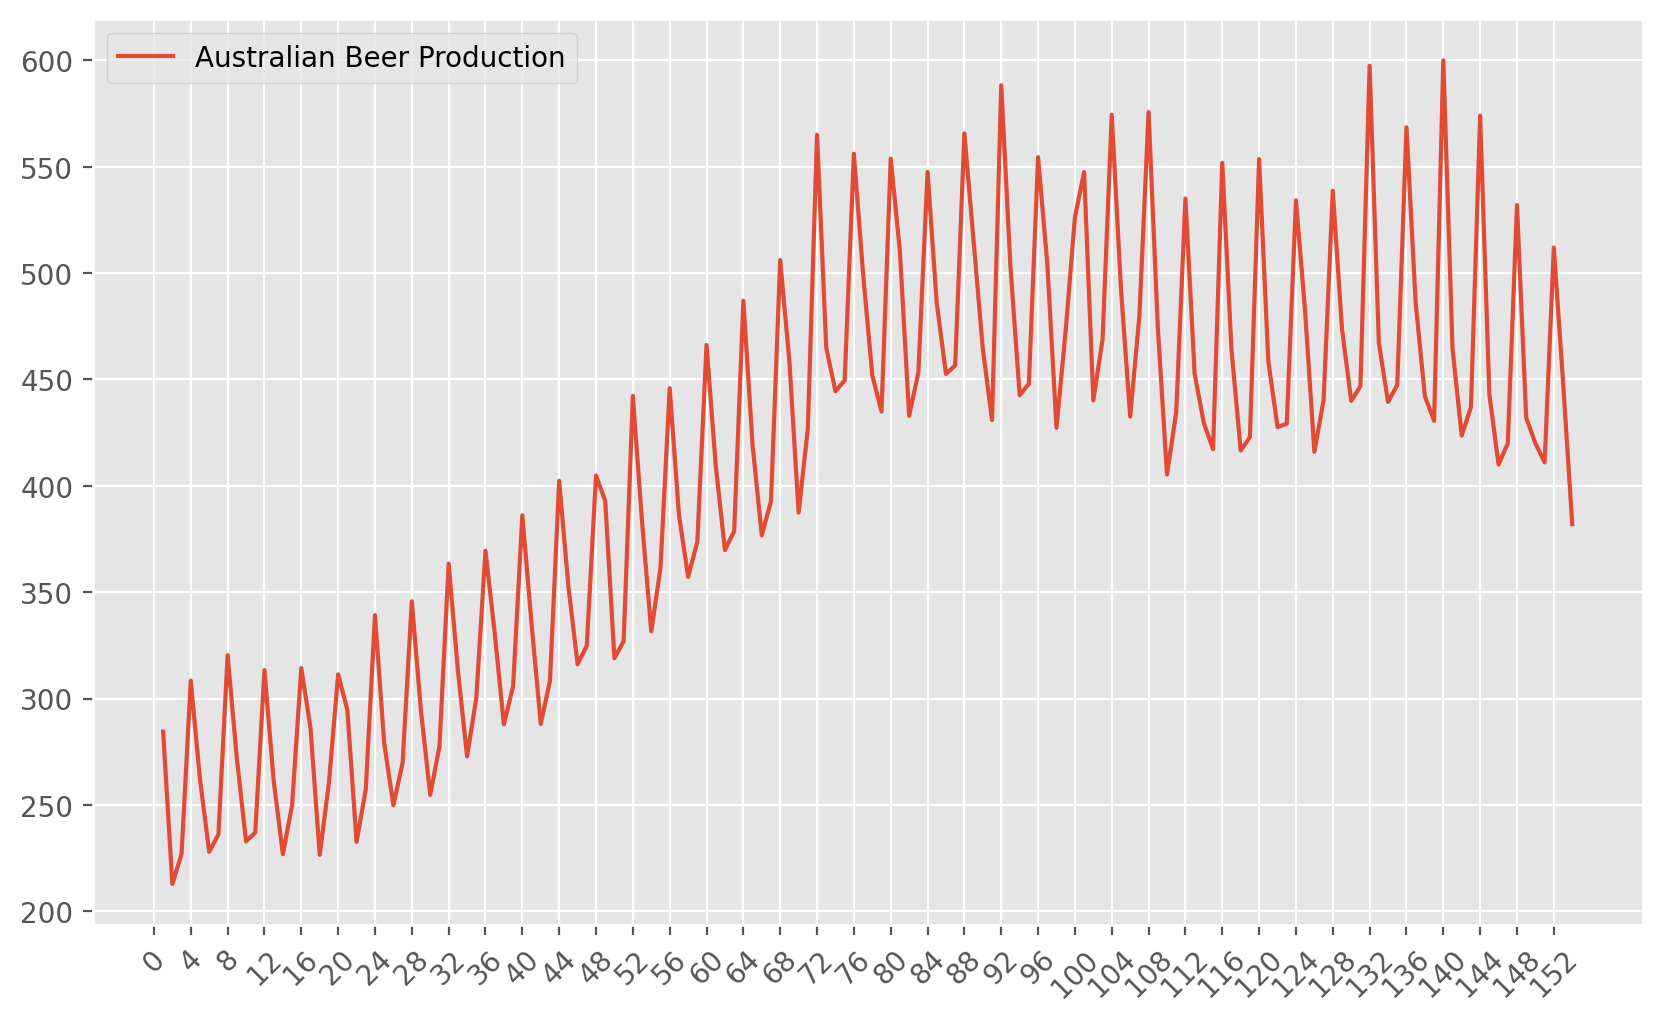

In [20]:
fig, ax = plt.subplots(figsize= (10,6), dpi = 200)
ax.plot(ausbeer_q, ausbeer_prod, label = "Australian Beer Production")
ax.legend()
ax.set_xticks([4*i for i in range(int(len(ausbeer)/4) + 1)])
for label in ax.get_xticklabels():
    label.set_rotation(45)
plt.show()

In [21]:
mod_sarima1 = sm.tsa.statespace.SARIMAX(ausbeer_prod, trend ='c', order=(0, 1, 0),
                                seasonal_order=(0, 1, 0, 4))
results_sarima1 = mod_sarima1.fit(disp=False) 
results_sarima1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                              prod   No. Observations:                  154
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 4)   Log Likelihood                -705.976
Date:                           Tue, 05 Apr 2022   AIC                           1415.953
Time:                                   22:52:23   BIC                           1421.961
Sample:                                        0   HQIC                          1418.394
                                           - 154                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1047      2.283     -0.046      0.963      -4.579       4.370
sigma2       763.8084     78.855      9.686      0.000     609.255     918.361
===================================================================================
Ljung-Box (L1) (Q):                  55.25   Jarque-Bera (JB):                 2.99
Prob(Q):                              0.00   Prob(JB):                         0.22
Heteroskedasticity (H):               3.04   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<h3>Part C</h3>

In [22]:
detrended_ausbeer = np.array([ausbeer_prod[i] - ausbeer_prod[i-1] for i in range(1,len(ausbeer))])
detrended_deseasonalized_ausbeer = np.array([detrended_ausbeer[i] - detrended_ausbeer[i-4] for i in range(4,len(detrended_ausbeer))])
deseasonalized_ausbeer = np.array([ausbeer_prod[i] - ausbeer_prod[i-4] for i in range(4,len(ausbeer_prod))])

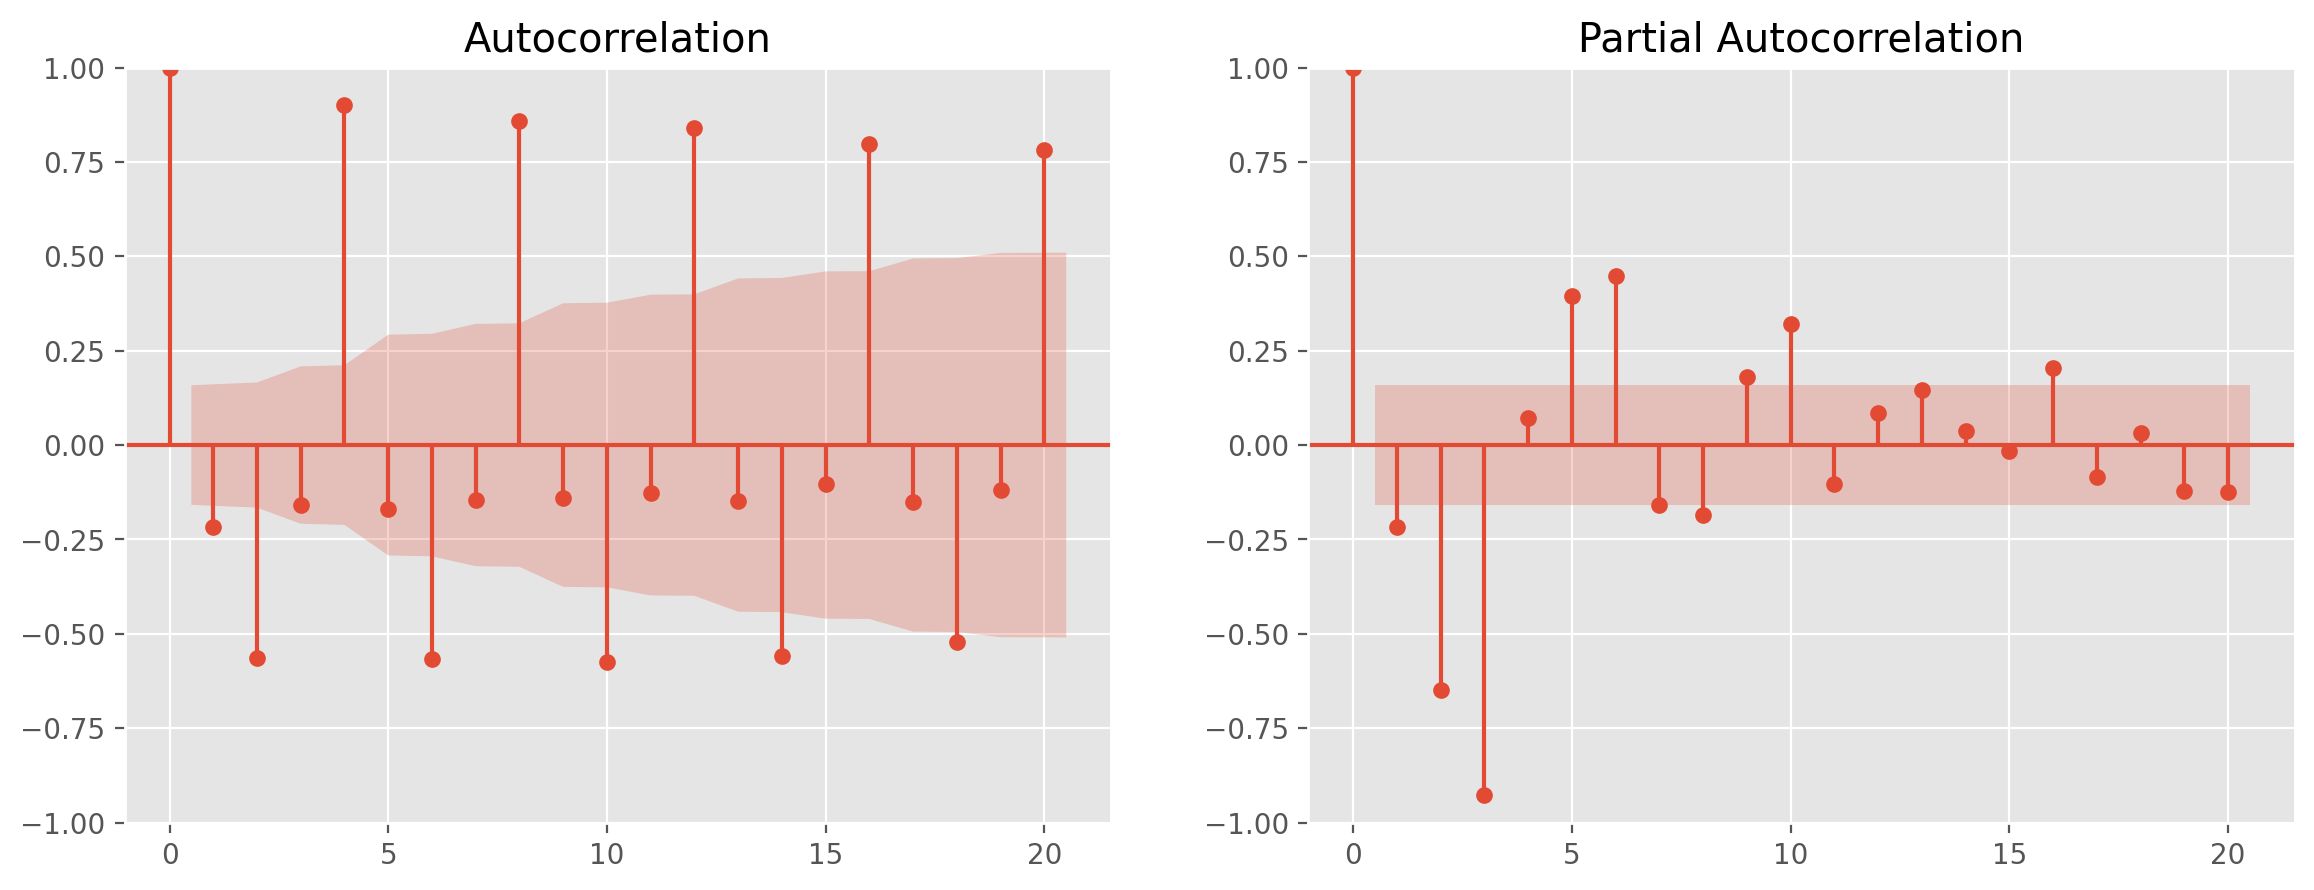

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14,5), dpi = 200)

fig = sm.graphics.tsa.plot_acf(detrended_ausbeer, lags=20, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(detrended_ausbeer, lags=20, ax=axes[1])

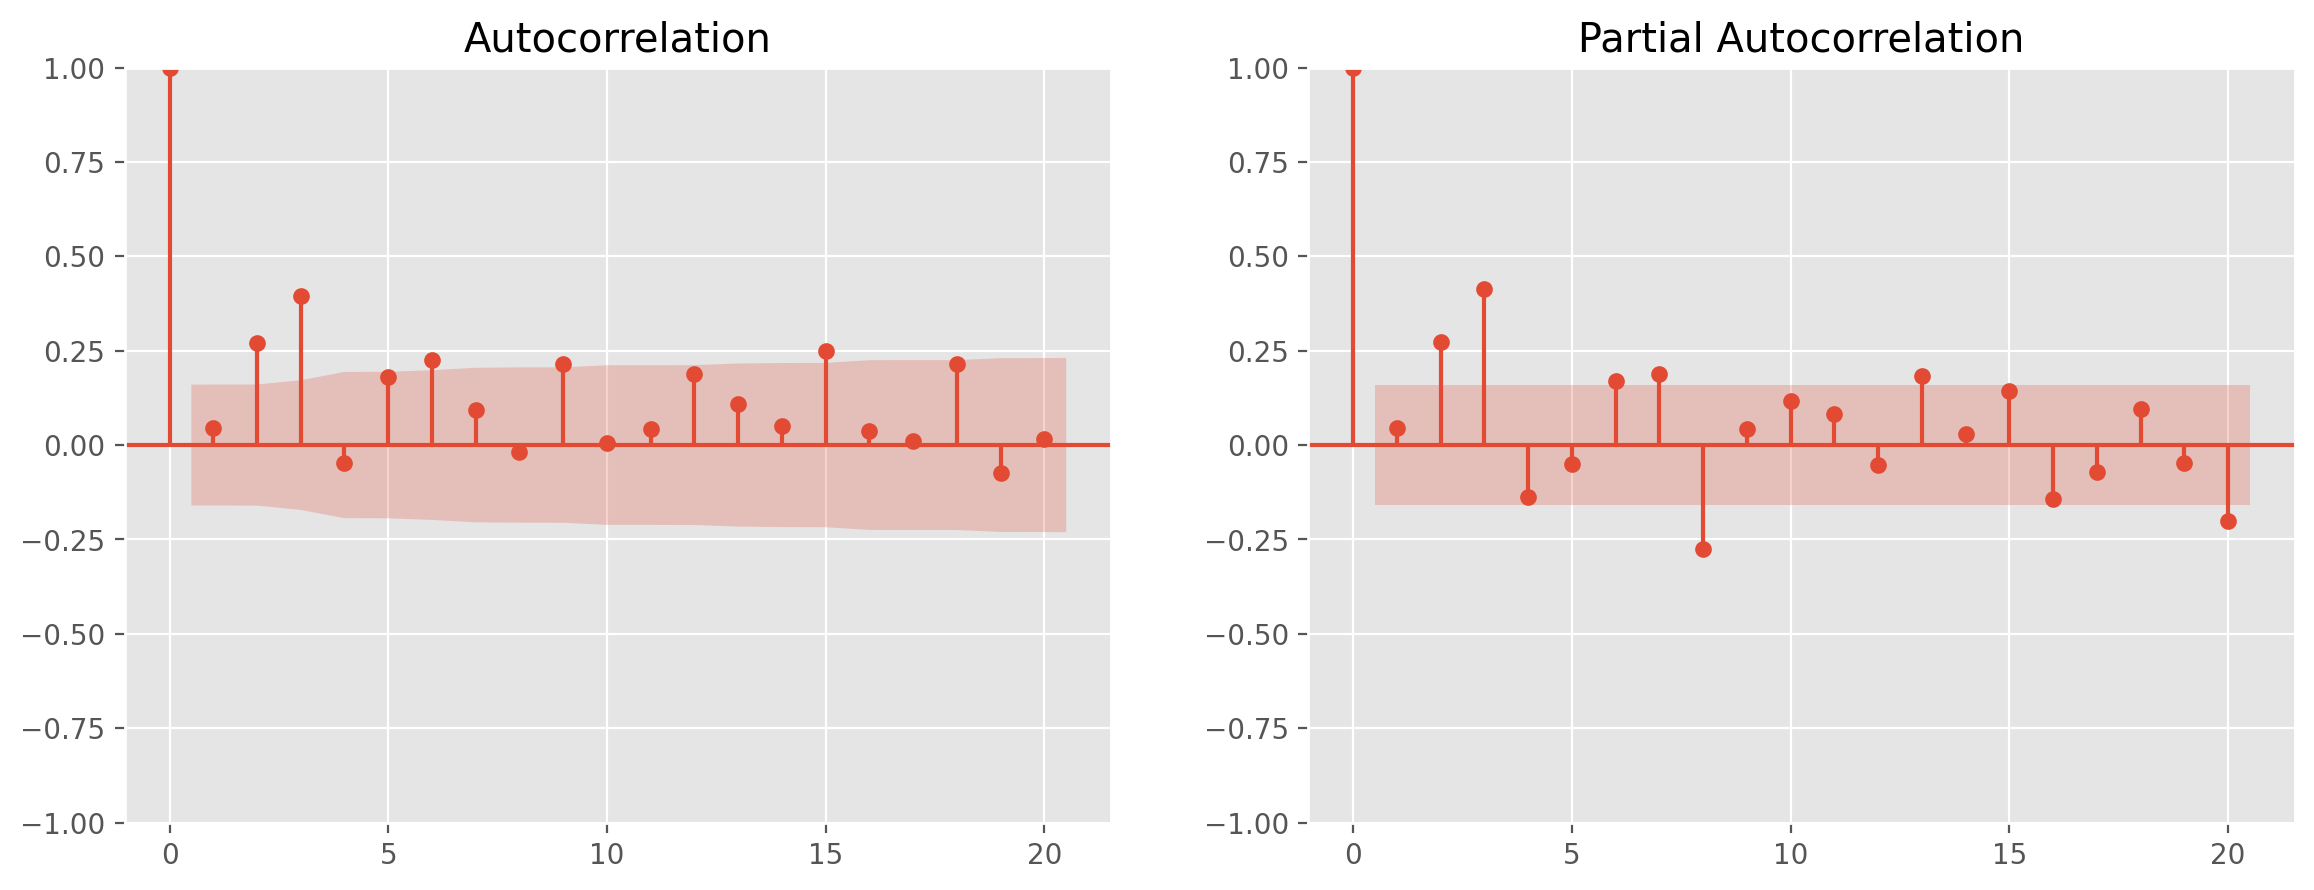

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14,5), dpi = 200)

fig = plot_acf(deseasonalized_ausbeer, lags=20, ax=axes[0])
fig = plot_pacf(deseasonalized_ausbeer, lags=20, ax=axes[1])

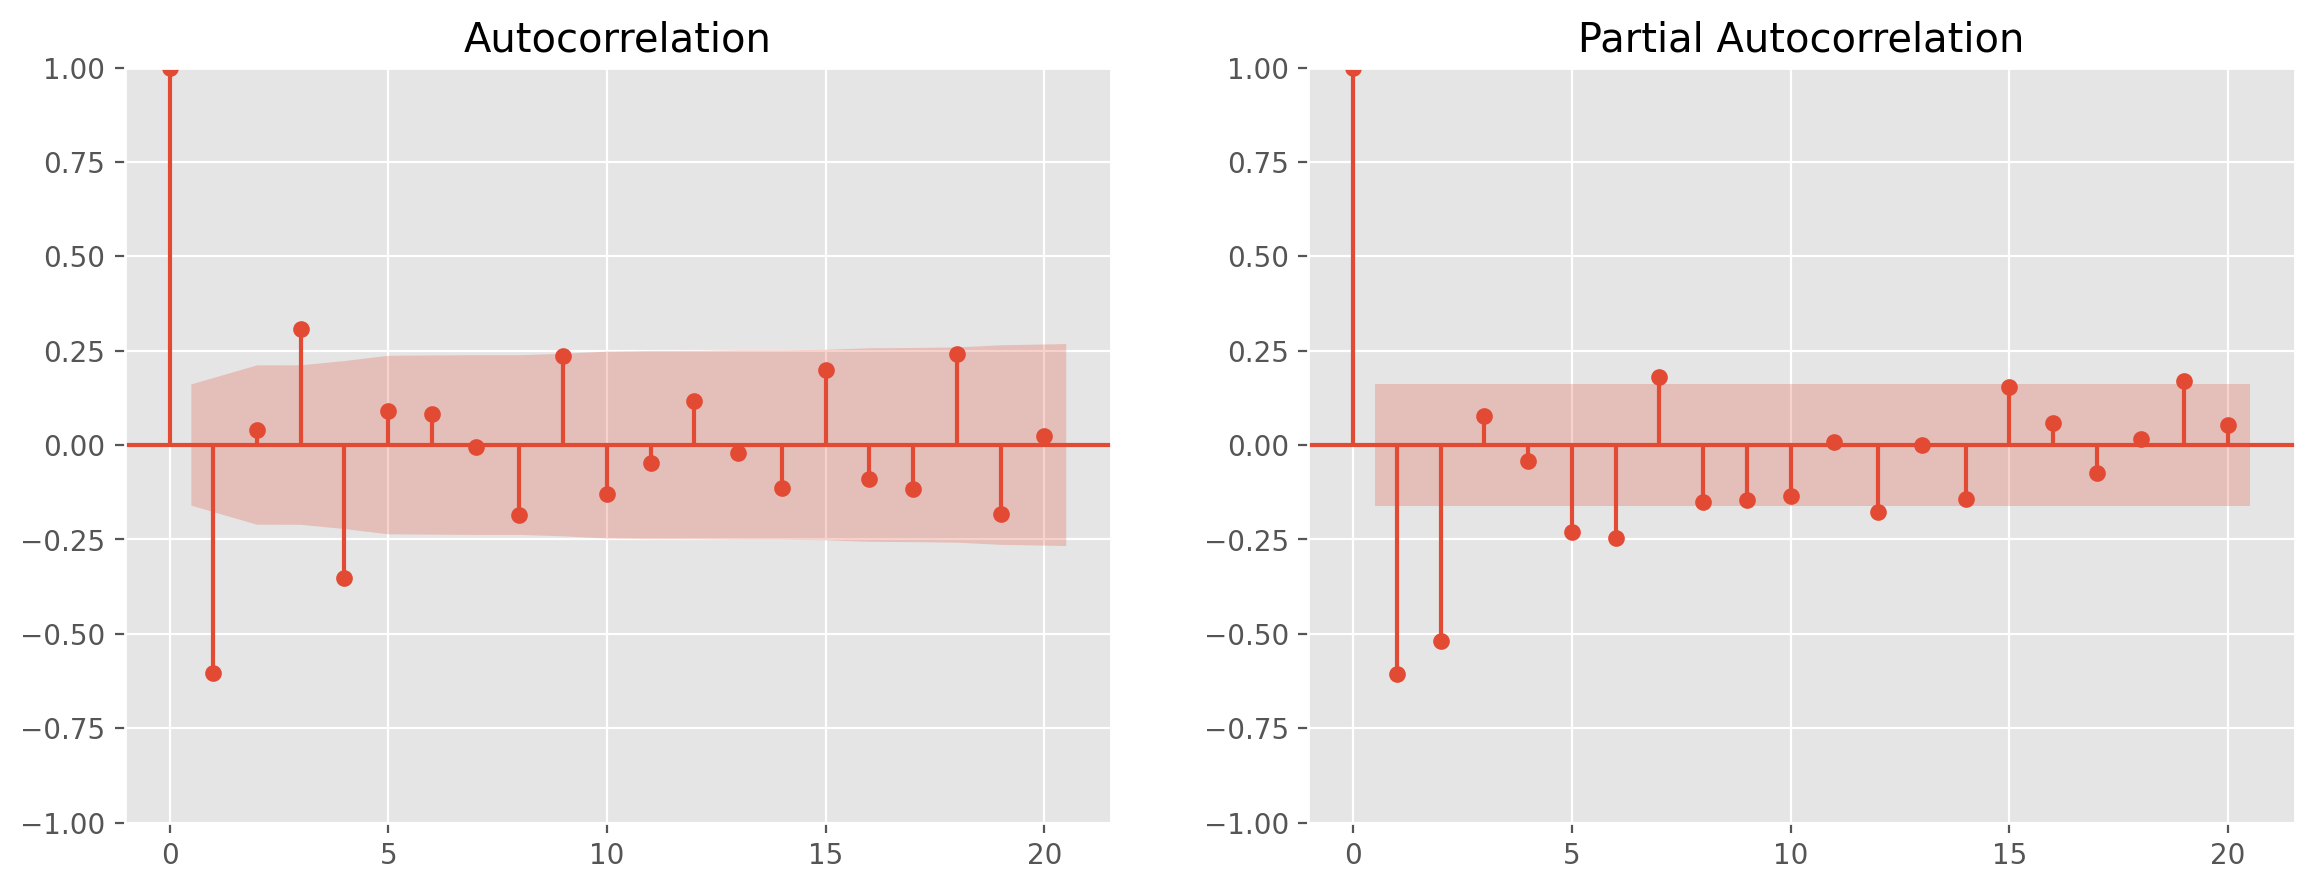

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(14,5), dpi = 200)

fig = plot_acf(detrended_deseasonalized_ausbeer, lags=20, ax=axes[0])
fig = plot_pacf(detrended_deseasonalized_ausbeer, lags=20, ax=axes[1])

<h3> Part D </h3>

In [26]:
mod_sarima2 = sm.tsa.statespace.SARIMAX(ausbeer_prod, trend ='c', order=(2, 1, 0),
                                seasonal_order=(0, 1, 0, 4))
results_sarima2 = mod_sarima2.fit(disp=False) 
results_sarima2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                              prod   No. Observations:                  154
Model:             SARIMAX(2, 1, 0)x(0, 1, 0, 4)   Log Likelihood                -645.877
Date:                           Tue, 05 Apr 2022   AIC                           1299.754
Time:                                   22:52:24   BIC                           1311.770
Sample:                                        0   HQIC                          1304.636
                                           - 154                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.2012      1.577     -0.128      0.898      -3.292       2.889
ar.L1         -0.9534      0.062    -15.260      0.000      -1.076      -0.831
ar.L2         -0.5409      0.073     -7.414      0.000      -0.684      -0.398
sigma2       338.2869     31.493     10.742      0.000     276.562     400.012
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                11.78
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               3.65   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
print("MAE of AR(2) model with detrending and deseasonalizing: {:.5f}".format(MAE(results_sarima2.fittedvalues[8:], ausbeer_prod[8:])))
print("MAPE of AR(2) model with detrending and deseasonalizing: {:.5f}".format(MAPE(results_sarima2.fittedvalues[8:], ausbeer_prod[8:])))
print("RMSE of AR(2) model with detrending and deseasonalizing: {:.5f}".format(RMSE(results_sarima2.fittedvalues[8:], ausbeer_prod[8:])))

MAE of AR(2) model with detrending and deseasonalizing: 14.05637
MAPE of AR(2) model with detrending and deseasonalizing: 0.03323
RMSE of AR(2) model with detrending and deseasonalizing: 18.36874


In [28]:
mod_sarima3 = sm.tsa.statespace.SARIMAX(ausbeer_prod, trend ='c', order=(2, 1, 3),
                                seasonal_order=(0, 1, 0, 4))
results_sarima3 = mod_sarima3.fit(disp=False) 
results_sarima3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               prod   No. Observations:                  154
Model:             SARIMAX(2, 1, 3)x(0, 1, [], 4)   Log Likelihood                -631.745
Date:                            Tue, 05 Apr 2022   AIC                           1277.490
Time:                                    22:52:24   BIC                           1298.518
Sample:                                         0   HQIC                          1286.033
                                            - 154                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1479      0.418     -0.354      0.723      -0.966       0.671
ar.L1         -0.4025      0.059     -6.774      0.000      -0.519      -0.286
ar.L2         -0.6638      0.063    -10.567      0.000      -0.787      -0.541
ma.L1         -0.7007      0.053    -13.198      0.000      -0.805      -0.597
ma.L2          0.8461      0.045     18.956      0.000       0.759       0.934
ma.L3         -0.8434      0.058    -14.610      0.000      -0.957      -0.730
sigma2       269.2314     31.183      8.634      0.000     208.114     330.349
===================================================================================
Ljung-Box (L1) (Q):                   1.06   Jarque-Bera (JB):                 0.75
Prob(Q):                              0.30   Prob(JB):                         0.69
Heteroskedasticity (H):               3.41   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
print("MAE of AR(2)&MA(3) model with detrending and deseasonalizing: {:.5f}".format(MAE(results_sarima3.fittedvalues[8:], ausbeer_prod[8:])))
print("MAPE of AR(2)&MA(3) model with detrending and deseasonalizing: {:.5f}".format(MAPE(results_sarima3.fittedvalues[8:], ausbeer_prod[8:])))
print("RMSE of AR(2)&MA(3) model with detrending and deseasonalizing: {:.5f}".format(RMSE(results_sarima3.fittedvalues[8:], ausbeer_prod[8:])))

MAE of AR(2)&MA(3) model with detrending and deseasonalizing: 13.18680
MAPE of AR(2)&MA(3) model with detrending and deseasonalizing: 0.03104
RMSE of AR(2)&MA(3) model with detrending and deseasonalizing: 16.57181


<h3> Part E </h3>

In [30]:
quarter155 = results_sarima3.predict(154).iloc[0]
print("One-quarter ahead forecast for quarter 155: {:.5f}".format(quarter155))
confidence = 0.95 ## Confidence for our prediction intervals
difference = st.norm.ppf((1+confidence)/2) * RMSE(results_sarima3.fittedvalues[8:], ausbeer_prod[8:])
print("95 percent confidence interval for the forecast: ({:.3f}, {:.3f})".format(quarter155-difference, quarter155+difference))

One-quarter ahead forecast for quarter 155: 403.25083
95 percent confidence interval for the forecast: (370.771, 435.731)


<h3> Part F </h3>

In [31]:
training_set = ausbeer_prod[:int(0.75*len(ausbeer_prod))]
test_set = ausbeer_prod[:int(0.75*(len(ausbeer_prod)))]

mod_sarima4 = sm.tsa.statespace.SARIMAX(training_set, trend ='c', order=(2, 1, 0),
                                seasonal_order=(0, 1, 0, 4))
results_sarima4 = mod_sarima4.fit(disp=False) 
print("MAE of AR(2) model with detrending and deseasonalizing on test set: {:.5f}".format(MAE(results_sarima4.predict()[8:], ausbeer_prod[8:])))
print("MAPE of AR(2) model with detrending and deseasonalizing on test set: {:.5f}".format(MAPE(results_sarima4.predict()[8:], ausbeer_prod[8:])))
print("RMSE of AR(2) model with detrending and deseasonalizing on test set: {:.5f}".format(RMSE(results_sarima4.predict()[8:], ausbeer_prod[8:])))

MAE of AR(2) model with detrending and deseasonalizing on test set: 13.72438
MAPE of AR(2) model with detrending and deseasonalizing on test set: 0.03371
RMSE of AR(2) model with detrending and deseasonalizing on test set: 18.33355


In [32]:
mod_sarima5 = sm.tsa.statespace.SARIMAX(training_set, trend ='c', order=(2, 1, 3),
                                seasonal_order=(0, 1, 0, 4))
results_sarima5 = mod_sarima5.fit(disp=False) 
print("MAE of AR(2)&MA(3) model with detrending and deseasonalizing on test set: {:.5f}".format(MAE(results_sarima5.predict()[8:], ausbeer_prod[8:])))
print("MAPE of AR(2)&MA(3) model with detrending and deseasonalizing on test set: {:.5f}".format(MAPE(results_sarima5.predict()[8:], ausbeer_prod[8:])))
print("RMSE of AR(2)&MA(3) model with detrending and deseasonalizing on test set: {:.5f}".format(RMSE(results_sarima5.predict()[8:], ausbeer_prod[8:])))

MAE of AR(2)&MA(3) model with detrending and deseasonalizing on test set: 12.62688
MAPE of AR(2)&MA(3) model with detrending and deseasonalizing on test set: 0.03106
RMSE of AR(2)&MA(3) model with detrending and deseasonalizing on test set: 16.85520


<h1> Question 3 </h1>

In [33]:
ausbeer['t'] = [i+1 for i in range(len(ausbeer))]
ausbeer['M1'] = [1,0,0,0] * int(len(ausbeer)/4) + [1,0]
ausbeer['M2'] = [0,1,0,0] * int(len(ausbeer)/4) + [0,1]
ausbeer['M3'] = [0,0,1,0] * int(len(ausbeer)/4) + [0,0]

In [34]:
ausbeer

,quarter,prod,t,M1,M2,M3
0,1,284.4,1,1,0,0
1,2,212.8,2,0,1,0
2,3,226.9,3,0,0,1
3,4,308.4,4,0,0,0
4,5,262.0,5,1,0,0
...,...,...,...,...,...,...
149,150,420.0,150,0,1,0
150,151,411.0,151,0,0,1
151,152,512.0,152,0,0,0
152,153,449.0,153,1,0,0


<h3>Part A</h3>

In [41]:
model_beer_dummies = sm.OLS.from_formula('prod ~ M1 + M2 + M3', ausbeer)
result1 = model_beer_dummies.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prod   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     13.29
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           9.73e-08
Time:                        22:54:49   Log-Likelihood:                -905.32
No. Observations:                 154   AIC:                             1819.
Df Residuals:                     150   BIC:                             1831.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    479.7684     14.213     33.756      0.000     451.685     507.852
M1           -67.3300     19.971     -3.371      0.001    -106.790     -27.870
M2          -115.3812     19.971     -5.778      0.000    -154.842     -75.921
M3          -102.2474     20.100     -5.087      0.000    -141.963     -62.532
==============================================================================
Omnibus:                       54.951   Durbin-Watson:                   0.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.787
Skew:                          -0.574   Prob(JB):                     0.000226
Kurtosis:                       1.860   Cond. No.                         4.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
print("MSE = {:.5f}".format(np.mean(np.square(result1.resid))))

MSE = 7476.83910


<h3>Part B</h3>

In [43]:
model_beer_trend_dummies = sm.OLS.from_formula('prod ~ t + M1 + M2 + M3', ausbeer)
result2 = model_beer_trend_dummies.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prod   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     133.7
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           2.97e-48
Time:                        22:54:50   Log-Likelihood:                -806.14
No. Observations:                 154   AIC:                             1622.
Df Residuals:                     149   BIC:                             1637.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    350.6493      9.935     35.296      0.000     331.018     370.280
t              1.6554      0.084     19.780      0.000       1.490       1.821
M1           -65.6746     10.523     -6.241      0.000     -86.469     -44.880
M2          -115.3812     10.523    -10.965      0.000    -136.175     -94.588
M3          -100.5920     10.591     -9.497      0.000    -121.521     -79.663
==============================================================================
Omnibus:                        3.876   Durbin-Watson:                   0.285
Prob(Omnibus):                  0.144   Jarque-Bera (JB):                2.965
Skew:                           0.208   Prob(JB):                        0.227
Kurtosis:                       2.462   Cond. No.                         400.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
print("MSE = {:.5f}".format(np.mean(np.square(result2.resid))))

MSE = 2062.08204


In [48]:
quarter155 = result1.params['Intercept'] + result1.params['M3']
print("One-quarter ahead forecast for quarter 155: {:.5f}".format(quarter155))
confidence = 0.95 ## Confidence for our prediction intervals
difference = st.norm.ppf((1+confidence)/2) * np.sqrt(np.mean(np.square(result1.resid)))
print("95 percent confidence interval for the forecast: ({:.3f}, {:.3f})".format(quarter155-difference, quarter155+difference))

One-quarter ahead forecast for quarter 155: 377.52105
95 percent confidence interval for the forecast: (208.045, 546.997)


In [49]:
quarter155 = result2.params['Intercept'] + result2.params['M3'] + result2.params['t'] * 155
print("One-quarter ahead forecast for quarter 155: {:.5f}".format(quarter155))
confidence = 0.95 ## Confidence for our prediction intervals
difference = st.norm.ppf((1+confidence)/2) * np.sqrt(np.mean(np.square(result2.resid)))
print("95 percent confidence interval for the forecast: ({:.3f}, {:.3f})".format(quarter155-difference, quarter155+difference))

One-quarter ahead forecast for quarter 155: 506.64019
95 percent confidence interval for the forecast: (417.638, 595.642)


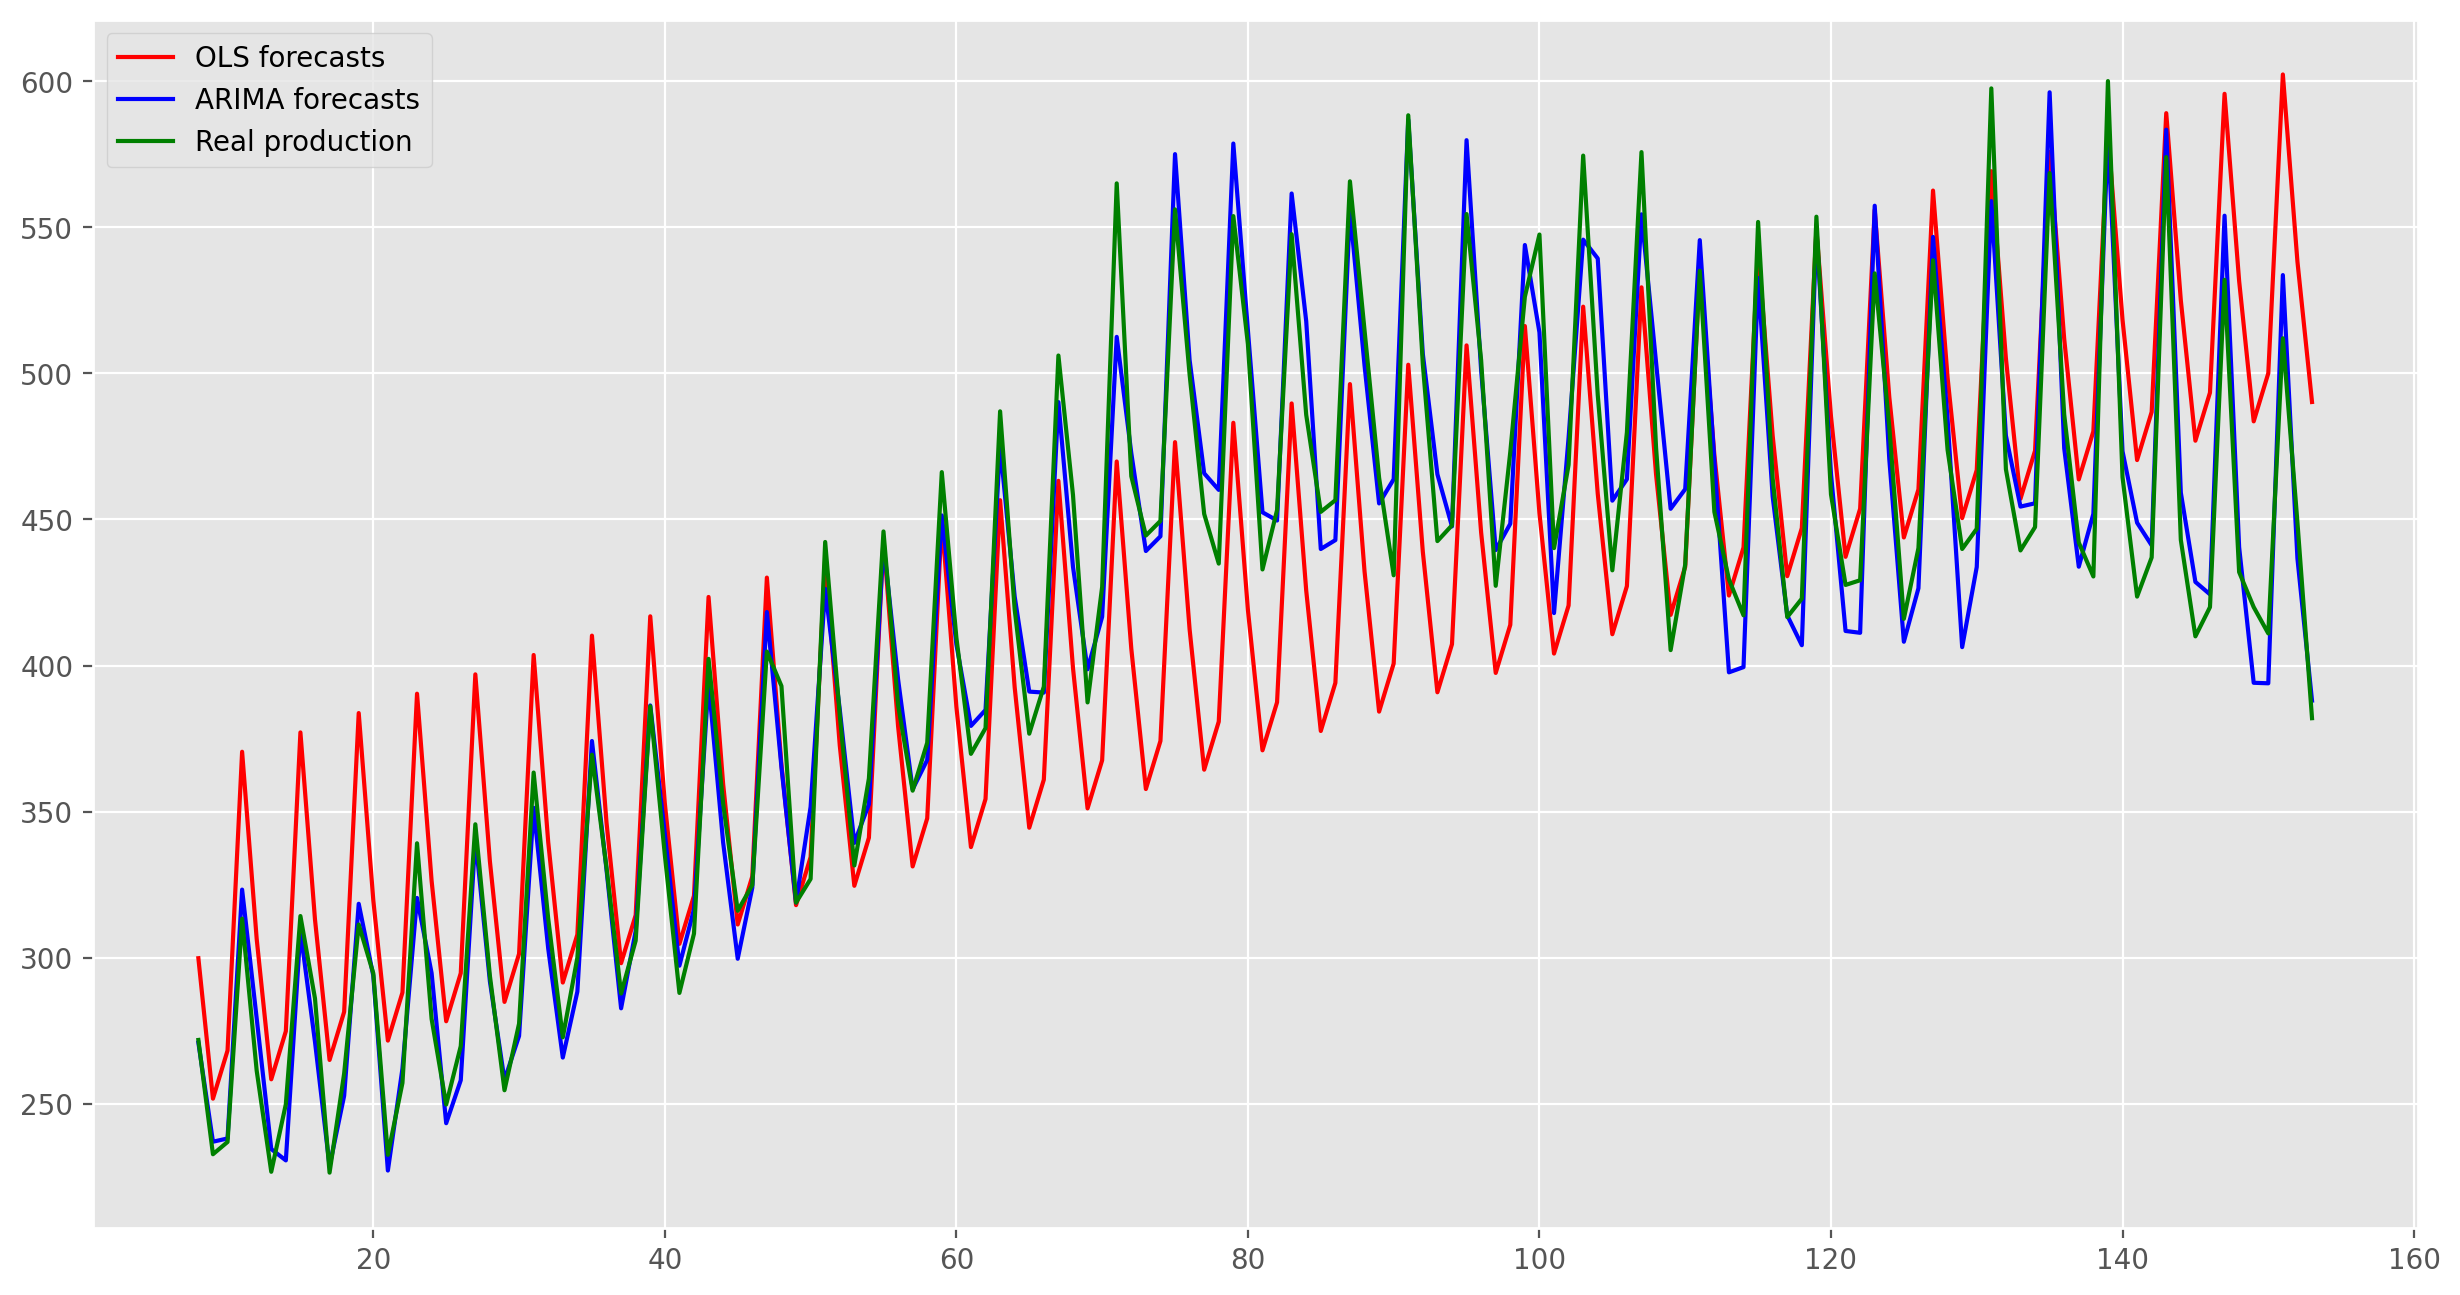

In [40]:
fig, ax = plt.subplots(figsize= (15,8), dpi = 200)
ax.plot(result.fittedvalues[8:], label = "OLS forecasts", color = "r")
ax.plot(results_sarima3.fittedvalues[8:], label = "ARIMA forecasts", color = "b")
ax.plot(ausbeer_prod[8:], label = "Real production", color = "g")
ax.legend()
plt.show()